<a href="https://colab.research.google.com/github/Sathyakumarnsk/human-pose-estimation-opencv/blob/master/hand_pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sathyakumarnsk/human-pose-estimation-opencv.git
%cd human-pose-estimation-opencv/m

Cloning into 'human-pose-estimation-opencv'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 31 (delta 4), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (31/31), done.
[Errno 2] No such file or directory: 'human-pose-estimation-opencv/m'
/content


In [3]:
!bash getmodelhand.sh

--2020-09-24 00:31:52--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/hand/pose_iter_102000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147344024 (141M) [text/plain]
Saving to: ‘hand/pose_iter_102000.caffemodel’

pose_iter_102000.ca 100%[===================>] 140.52M   413KB/s    in 5m 37s  

2020-09-24 00:37:30 (427 KB/s) - ‘hand/pose_iter_102000.caffemodel’ saved [147344024/147344024]



In [2]:
!pwd

/content


In [29]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


BODY_PARTS = { "Wrist": 0,
                "ThumbMetacarpal": 1, "ThumbProximal": 2, "ThumbMiddle": 3, "ThumbDistal": 4,
                "IndexFingerMetacarpal": 5, "IndexFingerProximal": 6, "IndexFingerMiddle": 7, "IndexFingerDistal": 8,
                "MiddleFingerMetacarpal": 9, "MiddleFingerProximal": 10, "MiddleFingerMiddle": 11, "MiddleFingerDistal": 12,
                "RingFingerMetacarpal": 13, "RingFingerProximal": 14, "RingFingerMiddle": 15, "RingFingerDistal": 16,
                "LittleFingerMetacarpal": 17, "LittleFingerProximal": 18, "LittleFingerMiddle": 19, "LittleFingerDistal": 20,
              }

POSE_PAIRS = [ ["Wrist", "ThumbMetacarpal"], ["ThumbMetacarpal", "ThumbProximal"],
                ["ThumbProximal", "ThumbMiddle"], ["ThumbMiddle", "ThumbDistal"],
                ["Wrist", "IndexFingerMetacarpal"], ["IndexFingerMetacarpal", "IndexFingerProximal"],
                ["IndexFingerProximal", "IndexFingerMiddle"], ["IndexFingerMiddle", "IndexFingerDistal"],
                ["Wrist", "MiddleFingerMetacarpal"], ["MiddleFingerMetacarpal", "MiddleFingerProximal"],
                ["MiddleFingerProximal", "MiddleFingerMiddle"], ["MiddleFingerMiddle", "MiddleFingerDistal"],
                ["Wrist", "RingFingerMetacarpal"], ["RingFingerMetacarpal", "RingFingerProximal"],
                ["RingFingerProximal", "RingFingerMiddle"], ["RingFingerMiddle", "RingFingerDistal"],
                ["Wrist", "LittleFingerMetacarpal"], ["LittleFingerMetacarpal", "LittleFingerProximal"],
                ["LittleFingerProximal", "LittleFingerMiddle"], ["LittleFingerMiddle", "LittleFingerDistal"] ]
width = 368
height = 368
inWidth = width
inHeight = height

#net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
proto='/content/hand/pose_deploy.prototxt'
model='/content/hand/pose_iter_102000.caffemodel'
net = cv.dnn.readNet(cv.samples.findFile(proto), cv.samples.findFile(model))
thr = 0.2



In [32]:
def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inp = cv.dnn.blobFromImage(frame, 0.003922, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inp)
    #net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    #out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    #assert(len(BODY_PARTS) == out.shape[1])
    print(out)

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return frame

In [13]:
import glob
print('f')

f


['./human-pose-estimation-opencv/00632.jpg', './human-pose-estimation-opencv/00606.jpg', './human-pose-estimation-opencv/00631.jpg', './human-pose-estimation-opencv/00608.jpg', './human-pose-estimation-opencv/00607.jpg', './human-pose-estimation-opencv/image.jpg']
./human-pose-estimation-opencv/00632.jpg
[[[[ 5.11412683e-04  4.89920145e-04  4.92543390e-04 ...  5.12726256e-04
     5.09715639e-04  7.97568588e-04]
   [ 4.76379297e-04  4.63388278e-04  4.67755948e-04 ...  5.17979381e-04
     5.05922071e-04  5.16564120e-04]
   [ 4.64432931e-04  4.51791973e-04  4.69718303e-04 ...  5.16480766e-04
     5.05298784e-04  5.05735865e-04]
   ...
   [ 1.22066075e-03  5.04076306e-04  5.15468069e-04 ...  5.05047152e-04
     5.02750161e-04  5.32996724e-04]
   [ 1.34704309e-03  1.13001326e-03  5.02492534e-04 ...  4.87663550e-04
     4.96612163e-04  7.31058710e-04]
   [ 2.10084510e-03  1.04864337e-03  5.44932438e-04 ...  5.14446758e-04
     5.17057197e-04  8.90753523e-04]]

  [[ 3.52543168e-04  3.37743433

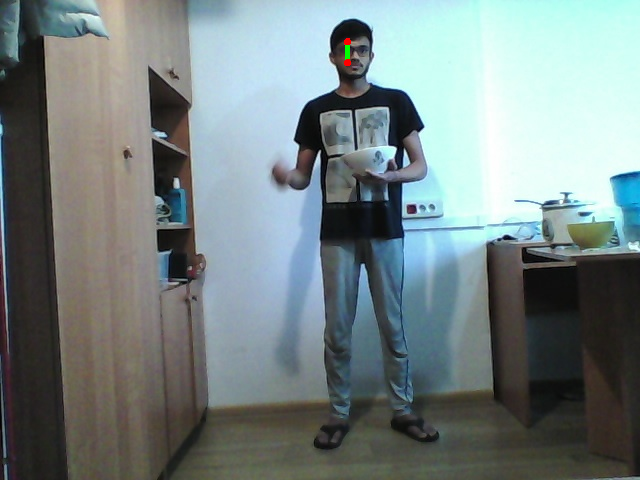

./human-pose-estimation-opencv/00606.jpg
[[[[ 5.27449360e-04  4.96670487e-04  4.98003094e-04 ...  5.29362238e-04
     5.18593821e-04  9.20698163e-04]
   [ 4.86184377e-04  4.75649198e-04  4.71937296e-04 ...  5.39630360e-04
     5.21560316e-04  5.84115216e-04]
   [ 4.74045053e-04  4.64049226e-04  4.71541716e-04 ...  5.40829496e-04
     5.23279712e-04  5.17520064e-04]
   ...
   [ 1.10320910e-03  5.06335869e-04  5.16166445e-04 ...  5.06454264e-04
     5.05661592e-04  5.31894329e-04]
   [ 1.26214512e-03  8.77474435e-04  5.04600117e-04 ...  4.90830629e-04
     4.99122019e-04  6.47518260e-04]
   [ 2.16442416e-03  9.61250742e-04  5.50061231e-04 ...  5.10487007e-04
     6.10003714e-04  1.09897042e-03]]

  [[ 3.69286427e-04  3.45014414e-04  3.42940708e-04 ...  3.76050710e-04
     3.67388129e-04  6.31489384e-04]
   [ 3.28359019e-04  3.23470798e-04  3.18994222e-04 ...  3.78877856e-04
     3.67640372e-04  4.09356464e-04]
   [ 3.20363150e-04  3.10718431e-04  3.14854959e-04 ...  3.74954572e-04
     3

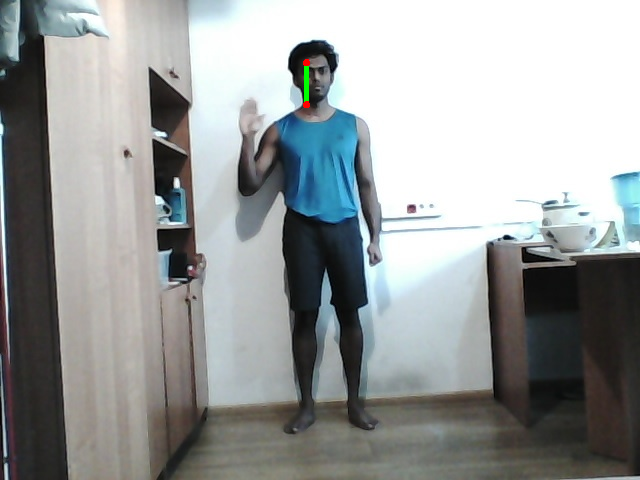

./human-pose-estimation-opencv/00631.jpg
[[[[ 5.07695135e-04  4.87969490e-04  4.90393490e-04 ...  5.13074570e-04
     5.09956386e-04  8.13400664e-04]
   [ 4.74766013e-04  4.61623946e-04  4.64793993e-04 ...  5.18417452e-04
     5.06132375e-04  5.16750617e-04]
   [ 4.63423727e-04  4.49283980e-04  4.67494363e-04 ...  5.17008069e-04
     5.05622593e-04  5.05971722e-04]
   ...
   [ 1.26016652e-03  5.16873086e-04  5.13794948e-04 ...  5.02038747e-04
     5.02453360e-04  5.33097424e-04]
   [ 1.38824759e-03  1.14860665e-03  5.01123839e-04 ...  4.86505567e-04
     4.96691908e-04  5.26696269e-04]
   [ 2.19057500e-03  1.10085763e-03  5.43710834e-04 ...  5.07847522e-04
     5.12669678e-04  7.46641599e-04]]

  [[ 3.48797854e-04  3.36479221e-04  3.34151671e-04 ...  3.61765531e-04
     3.59181780e-04  5.54155558e-04]
   [ 3.18415754e-04  3.13314726e-04  3.14013218e-04 ...  3.62208229e-04
     3.54403164e-04  3.65673739e-04]
   [ 3.11958545e-04  3.00244952e-04  3.14971956e-04 ...  3.54253891e-04
     3

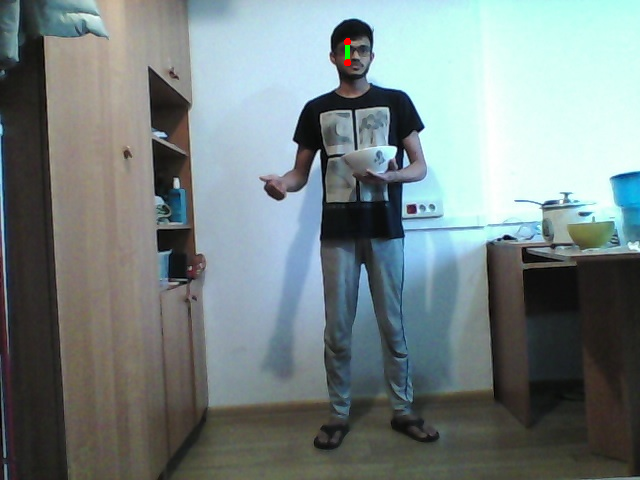

./human-pose-estimation-opencv/00608.jpg
[[[[ 5.28753386e-04  4.97025205e-04  4.98854206e-04 ...  5.29297569e-04
     5.18573215e-04  9.22235602e-04]
   [ 4.86396661e-04  4.76924353e-04  4.73418797e-04 ...  5.39556611e-04
     5.21554961e-04  5.85727859e-04]
   [ 4.74327360e-04  4.66013094e-04  4.73988068e-04 ...  5.40733978e-04
     5.23262832e-04  5.17539796e-04]
   ...
   [ 1.12652627e-03  5.06905199e-04  5.17386012e-04 ...  5.05934004e-04
     5.04027936e-04  5.32709004e-04]
   [ 1.22860819e-03  9.16252960e-04  5.05928590e-04 ...  4.89597674e-04
     4.97969624e-04  7.55053014e-04]
   [ 1.88027835e-03  9.24384105e-04  5.50895056e-04 ...  5.11236256e-04
     6.54817908e-04  1.14648440e-03]]

  [[ 3.70455993e-04  3.45071225e-04  3.43502528e-04 ...  3.75991920e-04
     3.67362780e-04  6.32399227e-04]
   [ 3.28381895e-04  3.23945889e-04  3.19489161e-04 ...  3.78813595e-04
     3.67644068e-04  4.10357607e-04]
   [ 3.20341147e-04  3.11593700e-04  3.15790589e-04 ...  3.74862953e-04
     3

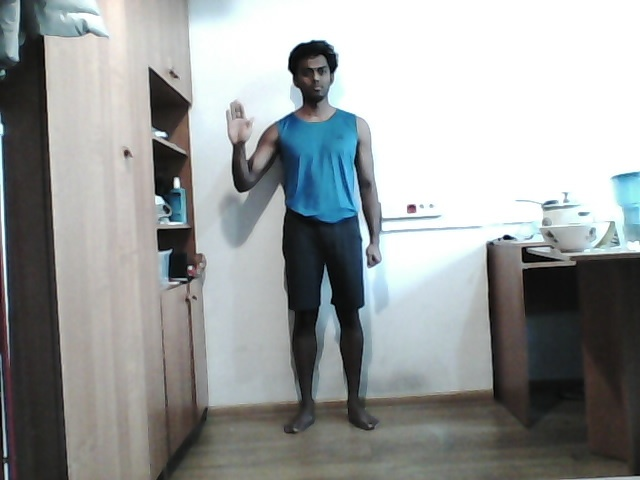

./human-pose-estimation-opencv/00607.jpg
[[[[ 5.28784294e-04  4.97368223e-04  4.99128364e-04 ...  5.29326149e-04
     5.18584333e-04  9.21452360e-04]
   [ 4.86955862e-04  4.78170754e-04  4.74595465e-04 ...  5.39600907e-04
     5.21569746e-04  5.85283153e-04]
   [ 4.75063454e-04  4.67594247e-04  4.74190805e-04 ...  5.40768029e-04
     5.23255614e-04  5.17528038e-04]
   ...
   [ 1.17092323e-03  5.06340875e-04  5.15958411e-04 ...  5.06094832e-04
     5.04605472e-04  5.34031424e-04]
   [ 1.28476392e-03  9.30649461e-04  5.04519383e-04 ...  4.90672712e-04
     4.97945002e-04  6.26731780e-04]
   [ 2.20887130e-03  1.00433559e-03  5.50139521e-04 ...  5.13007981e-04
     5.43401926e-04  1.00658718e-03]]

  [[ 3.70864087e-04  3.45399079e-04  3.43505933e-04 ...  3.76011827e-04
     3.67370667e-04  6.31910807e-04]
   [ 3.29137314e-04  3.24758177e-04  3.20020190e-04 ...  3.78841592e-04
     3.67651868e-04  4.10074368e-04]
   [ 3.21147789e-04  3.12803953e-04  3.15818703e-04 ...  3.74887633e-04
     3

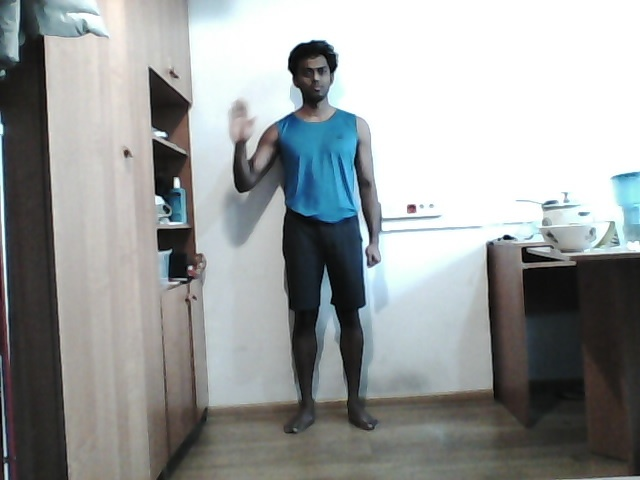

./human-pose-estimation-opencv/image.jpg
[[[[ 1.27316429e-03  1.05838792e-03  6.78841956e-04 ...  5.25057898e-04
     5.16329310e-04  7.64814322e-04]
   [ 1.01586804e-03  7.27773528e-04  5.11143939e-04 ...  5.35714615e-04
     5.19804424e-04  5.24699921e-04]
   [ 5.17035834e-04  5.02631185e-04  5.16396540e-04 ...  5.36752399e-04
     5.21810609e-04  5.16980304e-04]
   ...
   [ 7.18373398e-04  6.40518148e-04  5.31908241e-04 ...  5.98845305e-04
     1.07339141e-03  8.01046786e-04]
   [ 8.97611084e-04  1.23302022e-03  5.90118871e-04 ...  8.71504075e-04
     1.60880829e-03  1.83813192e-03]
   [ 1.45040289e-03  9.88703221e-04  5.76646940e-04 ...  7.90868129e-04
     1.37208099e-03  1.14560814e-03]]

  [[ 9.61548591e-04  7.11774686e-04  4.66831319e-04 ...  3.72133160e-04
     3.65241227e-04  5.32682403e-04]
   [ 7.30801956e-04  4.85148747e-04  3.52195901e-04 ...  3.74469906e-04
     3.64704523e-04  3.71908420e-04]
   [ 4.77053283e-04  3.39739549e-04  3.48746224e-04 ...  3.71058704e-04
     3

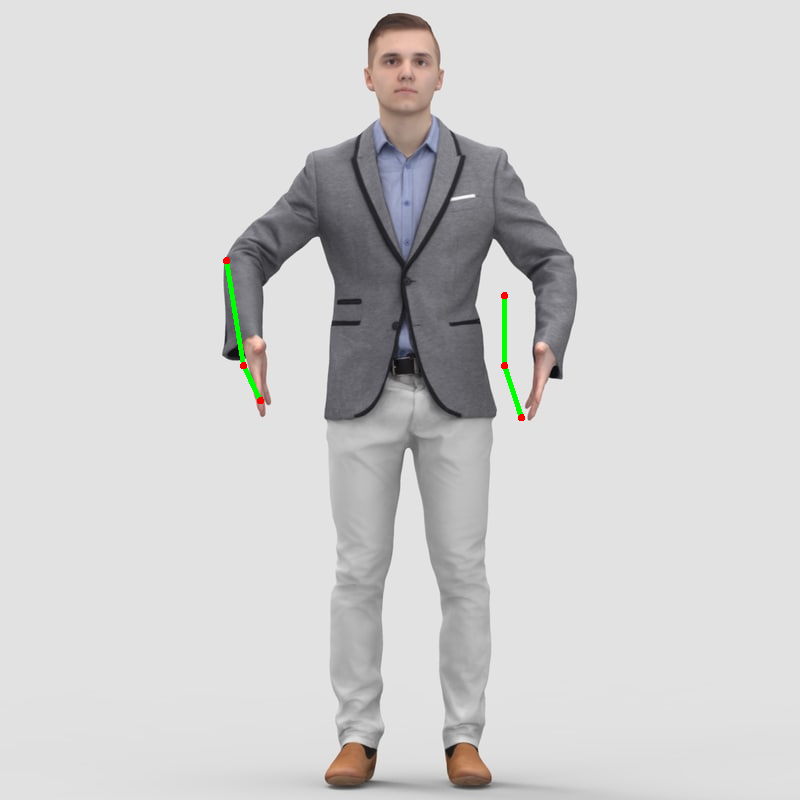

In [34]:
all_jpg_files=glob.glob('./*/*.jpg')
print(all_jpg_files)
for i,file in enumerate(all_jpg_files):
  input = cv.imread(file)
  print(file)
  output = poseDetector(input)
  cv2_imshow(output)
  #cv.waitkey(500)
  #cv2.imwrite(output)
  #import matplotlib as plt
  

In [18]:

import cv2
cap = cv2.VideoCapture('dance.mp4')
if cap is None:
  print('File not loaded')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = poseDetector(frame)
  out.write(output)
out.release()
print("Done processing video")

AttributeError: ignored

In [ ]:
!ls -lr
